In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [28]:
# Set the font type
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

## PCA

In [2]:
df = pd.read_csv('Final_Datasets/Clean_df_safetyindex.csv')
df.head()

,ID,PEOPCOLORPCT,LOWINCPCT,UNEMPPCT,DISABILITYPCT,LINGISOPCT,LESSHSPCT,UNDER5PCT,OVER64PCT,LIFEEXPPCT,...,Work_Carpooled_P,Work_PublicTransportation_P,Work_Walk_P,Work_Taximotorbike_P,Work_Fromhome_P,With_PublicAssIncome_P,With_SSI_P,Mean_Transportation_time(min),Mean_Proportion_HHIncome,Owner_occupied_P
0,51153900100,0.501237,0.076685,0.006587,0.095916,0.033355,0.044565,0.057205,0.299320,0.182564,...,0.025731,0.052047,0.000000,0.074854,0.232749,0.020526,0.053239,45.510671,0.236878,0.840136
1,51153900201,0.771815,0.327176,0.067423,0.154357,0.096774,0.133784,0.032364,0.072102,0.217436,...,0.107548,0.016700,0.015364,0.000000,0.177021,0.080125,0.037461,40.846185,0.353119,0.530788
2,51153900202,0.731086,0.276916,0.048494,0.039679,0.135111,0.171480,0.040980,0.066440,0.169231,...,0.126697,0.009872,0.000000,0.040313,0.066228,0.122667,0.000000,35.776432,0.258486,0.841901
3,51153900203,0.889301,0.301155,0.042468,0.100787,0.143670,0.191298,0.095228,0.057529,0.206154,...,0.081136,0.019270,0.061866,0.036004,0.034483,0.076102,0.077525,39.437598,0.339889,0.101680
4,51153900301,0.556382,0.232398,0.092181,0.134315,0.093147,0.109264,0.048369,0.089010,0.180513,...,0.089256,0.072727,0.076584,0.008815,0.135537,0.088490,0.023287,37.584449,0.345896,0.603892


In [10]:
# Drop the ID column (and the last tract since it is not livable)
df_numeric = df.drop(columns=["ID"], errors='ignore')[:92]
df_numeric.head()

,PEOPCOLORPCT,LOWINCPCT,UNEMPPCT,DISABILITYPCT,LINGISOPCT,LESSHSPCT,UNDER5PCT,OVER64PCT,LIFEEXPPCT,PRE1960PCT,...,Work_Carpooled_P,Work_PublicTransportation_P,Work_Walk_P,Work_Taximotorbike_P,Work_Fromhome_P,With_PublicAssIncome_P,With_SSI_P,Mean_Transportation_time(min),Mean_Proportion_HHIncome,Owner_occupied_P
0,0.501237,0.076685,0.006587,0.095916,0.033355,0.044565,0.057205,0.299320,0.182564,0.045257,...,0.025731,0.052047,0.000000,0.074854,0.232749,0.020526,0.053239,45.510671,0.236878,0.840136
1,0.771815,0.327176,0.067423,0.154357,0.096774,0.133784,0.032364,0.072102,0.217436,0.112476,...,0.107548,0.016700,0.015364,0.000000,0.177021,0.080125,0.037461,40.846185,0.353119,0.530788
2,0.731086,0.276916,0.048494,0.039679,0.135111,0.171480,0.040980,0.066440,0.169231,0.584518,...,0.126697,0.009872,0.000000,0.040313,0.066228,0.122667,0.000000,35.776432,0.258486,0.841901
3,0.889301,0.301155,0.042468,0.100787,0.143670,0.191298,0.095228,0.057529,0.206154,0.102104,...,0.081136,0.019270,0.061866,0.036004,0.034483,0.076102,0.077525,39.437598,0.339889,0.101680
4,0.556382,0.232398,0.092181,0.134315,0.093147,0.109264,0.048369,0.089010,0.180513,0.198137,...,0.089256,0.072727,0.076584,0.008815,0.135537,0.088490,0.023287,37.584449,0.345896,0.603892


In [12]:
# Check the missing value
df_missing = df_numeric.isna().sum().reset_index()
df_missing[df_missing[0]!=0]

,index,0
8,LIFEEXPPCT,15
19,DWATER,2


In [15]:
df_numeric[['LIFEEXPPCT','DWATER']].describe()

,LIFEEXPPCT,DWATER
count,77.000000,90.0
mean,0.178395,0.0
std,0.019857,0.0
min,0.117949,0.0
25%,0.169231,0.0
50%,0.175385,0.0
75%,0.185641,0.0
max,0.226667,0.0


- Use mean value of `LIFEEXPPCT` to replace the missing value 
- Drop `DWATER` since it is all 0

In [16]:
# Use mean value of LIFEEXPPCT to replace the missing value and drop DWATER
df_numeric = df_numeric.drop(columns='DWATER')
df_numeric.fillna(df_numeric.mean(), inplace=True)

In [19]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

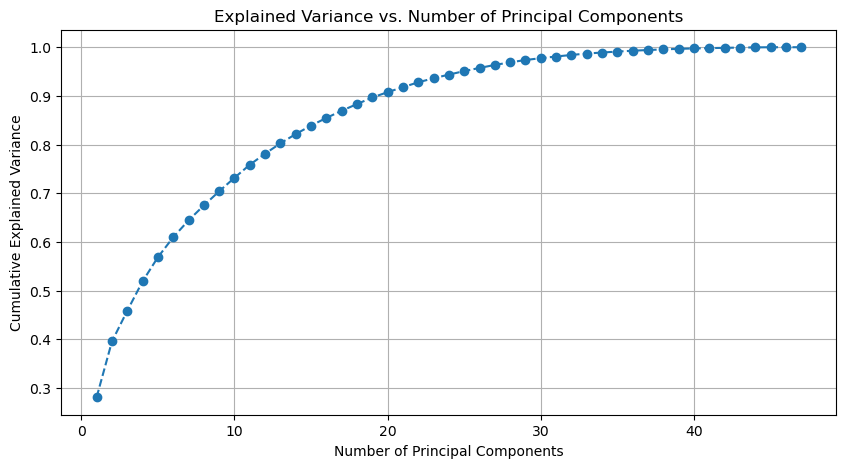

In [20]:
# Perform PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Principal Components")
plt.grid(True)
plt.show()

In [21]:
# Select number of components that explain ~90% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Optimal number of components: {n_components}")

Optimal number of components: 20


In [22]:
# Apply PCA with optimal components
pca_final = PCA(n_components=n_components)
principal_components = pca_final.fit_transform(df_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(principal_components, columns=[f"PC{i+1}" for i in range(n_components)])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-2.359055,0.544284,2.770926,1.374517,-0.591456,-1.786979,0.220788,-2.521613,0.337707,0.039251,-2.492542,-1.966140,0.707167,0.224762,0.446710,-0.616343,-0.849244,-1.575012,-0.701967,-0.014039
1,5.530520,-0.182411,3.559746,-0.338643,0.175276,-2.696554,-1.598638,-0.292056,0.111252,-1.507317,0.378056,1.081119,-0.457675,1.719714,0.425642,-0.825932,0.143237,1.195063,0.284884,-0.963055
2,3.417301,1.096178,2.373906,-1.915860,-1.800533,-2.265973,3.182418,-2.987258,0.440458,0.762667,0.258858,4.234627,1.640188,-1.463900,0.592606,1.556884,0.543900,0.673220,-0.519080,0.179036
3,6.919279,-0.006880,0.154336,0.619352,0.021418,-1.753432,-2.362966,-2.100208,-1.375677,-0.717300,-1.156255,-0.498180,0.037332,-1.411614,-0.870927,-0.423201,1.062538,0.187359,-0.827302,-0.638357
4,4.287594,-0.095396,4.259988,1.916635,-0.245436,-2.255423,-0.313042,0.029353,0.266283,1.882678,2.093559,0.231476,-1.266956,1.047777,-0.164721,1.909154,0.342233,0.830550,-0.283817,-0.792184


In [25]:
# Get the loadings (how much each original variable contributes to each principal component)
loadings = pd.DataFrame(pca_final.components_.T, 
                        columns=[f"PC{i+1}" for i in range(n_components)], 
                        index=df_numeric.columns)

# Display the loadings
print("PCA Loadings (Variable Contributions to Each Component):")
display(loadings)

PCA Loadings (Variable Contributions to Each Component):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
PEOPCOLORPCT,0.220058,-0.108714,-0.087554,0.006225,-0.116293,0.074349,0.096391,-0.012080,-0.155839,-0.059024,-0.205384,0.054552,0.042647,0.146671,-0.007267,-0.044571,-0.032025,0.008860,0.070748,0.037998
LOWINCPCT,0.255241,0.042029,-0.032926,-0.011343,0.029514,0.053514,-0.020315,0.005324,0.116413,0.006510,0.016664,0.052346,0.016064,-0.000428,-0.011365,0.025734,-0.087834,-0.089264,0.036172,0.116426
UNEMPPCT,0.093595,0.064192,0.147726,0.127114,-0.062209,0.247710,-0.056180,0.193756,-0.306320,0.236279,0.266443,-0.005861,0.317429,0.158113,-0.108693,0.094689,0.160941,0.092030,-0.202509,-0.145946
DISABILITYPCT,0.017306,-0.034405,0.404050,0.149811,0.203705,0.121573,-0.162962,0.140381,-0.020354,-0.182746,-0.068578,-0.070488,0.229270,0.153214,0.033568,0.037190,0.145251,0.007552,0.047222,0.036375
LINGISOPCT,0.200464,-0.096207,-0.017059,-0.024111,0.151328,0.003411,0.030178,-0.052840,-0.031676,0.232479,0.021214,0.077366,0.050028,-0.152613,-0.064656,-0.001262,-0.182221,-0.202465,0.327733,-0.228706
LESSHSPCT,0.204628,-0.096577,0.012274,-0.193050,0.131356,0.136472,0.136742,-0.078626,-0.013641,0.022607,-0.112739,-0.056416,0.135362,-0.002786,-0.043462,0.025584,0.004783,-0.008250,0.252081,0.074351
UNDER5PCT,0.101455,0.039587,-0.283266,0.011263,-0.143687,-0.151977,-0.094855,0.224370,-0.240296,0.004883,-0.050203,-0.288503,-0.025828,-0.077356,-0.113204,0.237982,0.122707,-0.135982,-0.043026,0.178775
OVER64PCT,-0.082843,-0.058552,0.333792,0.149828,0.257295,-0.022731,-0.102085,0.108822,0.156954,-0.129068,-0.082160,-0.098774,0.250411,-0.124524,0.094160,-0.015233,0.035649,-0.244587,0.031801,-0.004213
LIFEEXPPCT,0.089033,0.010670,0.081051,-0.108200,0.219992,0.092220,-0.133404,-0.375607,-0.100112,-0.372809,-0.024370,-0.140084,-0.117762,0.076577,-0.109433,-0.059608,-0.179492,0.224181,-0.195082,-0.124897
PRE1960PCT,0.080295,0.200398,0.163510,-0.115458,0.021973,0.036211,0.150259,-0.322810,0.039713,0.065929,-0.004003,0.377464,-0.025484,-0.034705,0.167409,0.332334,0.124822,-0.005889,-0.072204,-0.082348


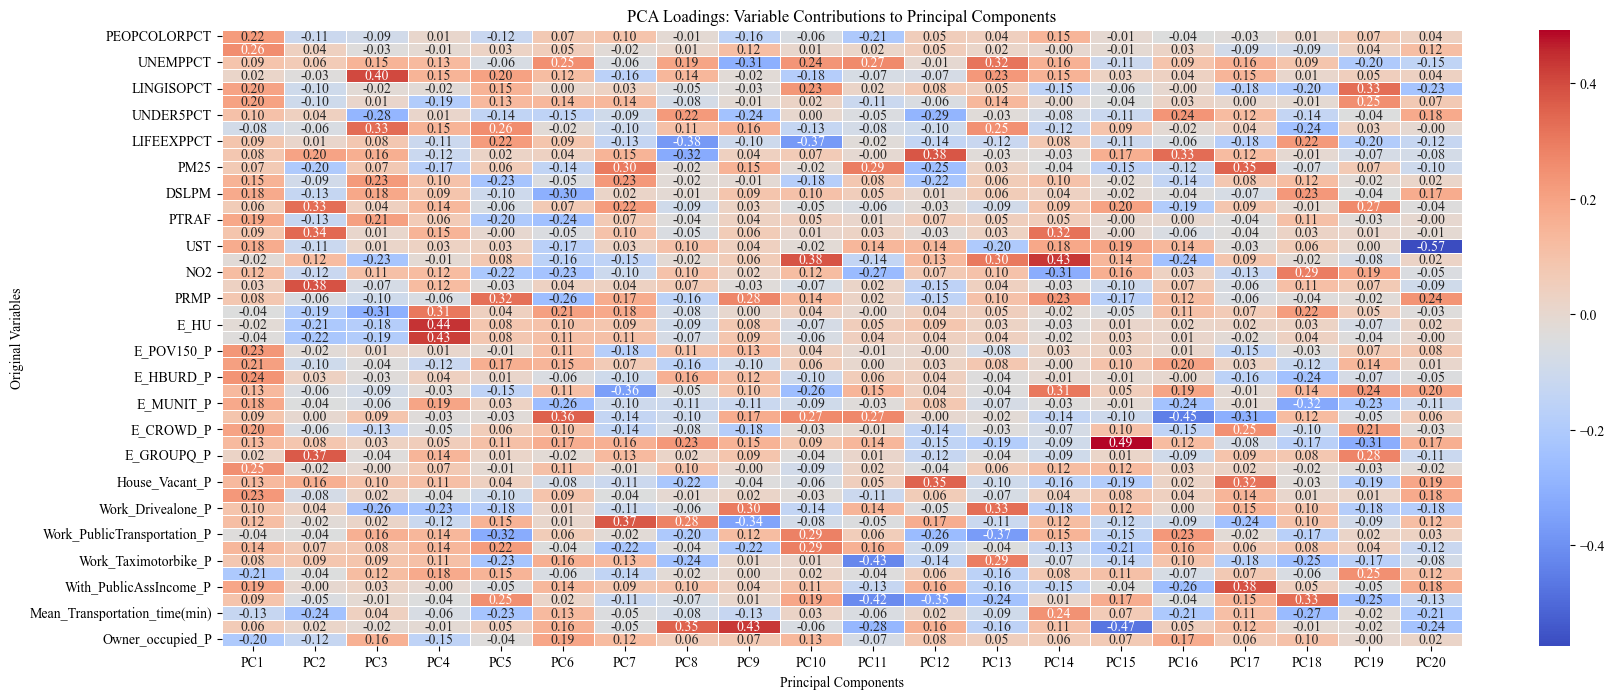

In [29]:
# Plot heatmap of PCA loadings
plt.figure(figsize=(20, 8))
sns.heatmap(loadings, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("PCA Loadings: Variable Contributions to Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Original Variables")
plt.show()